

# HOMEWORK 13

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [2]:
from collections import Counter

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)



### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<ipython-input-3-06baae282b69>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


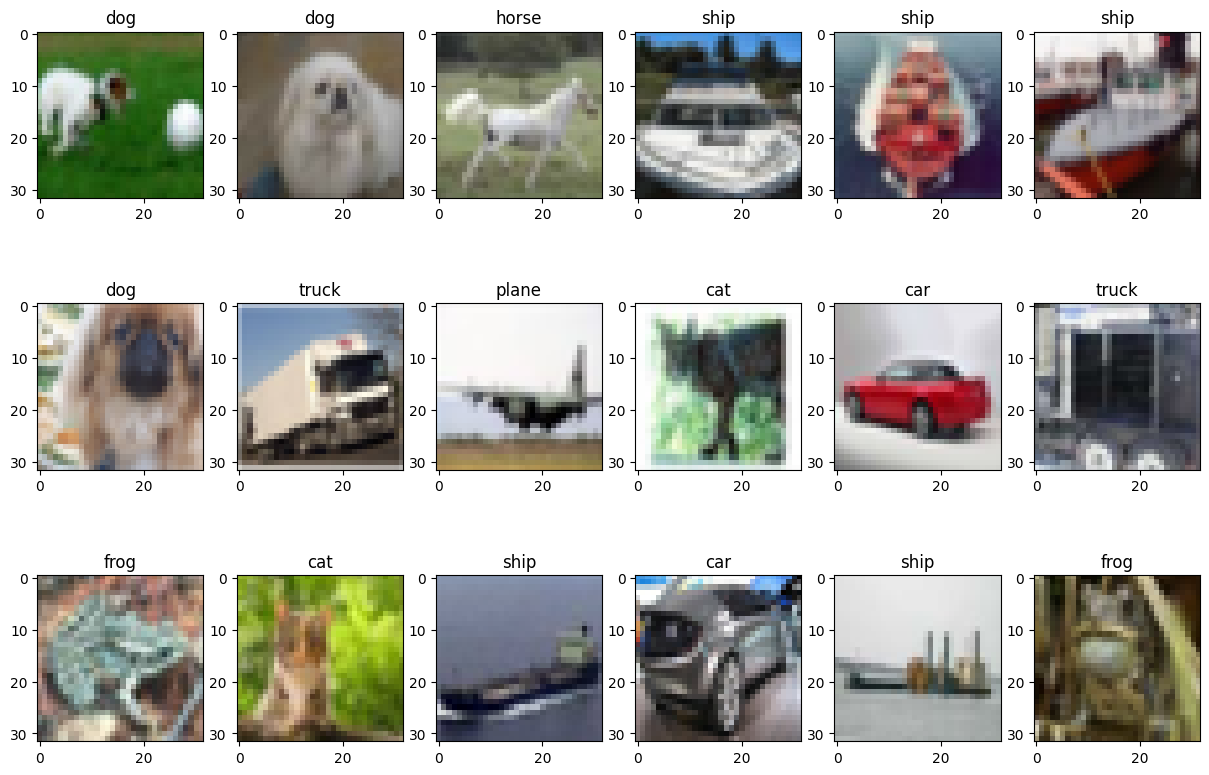

In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {0:'plane', 1:'car', 2:'bird', 3:'cat', 4:'deer',
           5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):
    plt.subplot(3,6,ii+1)
    # Pick a random sample
    idx = np.random.randint(0, len(x_train))
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Class type'), Text(0, 0.5, 'Counts'))

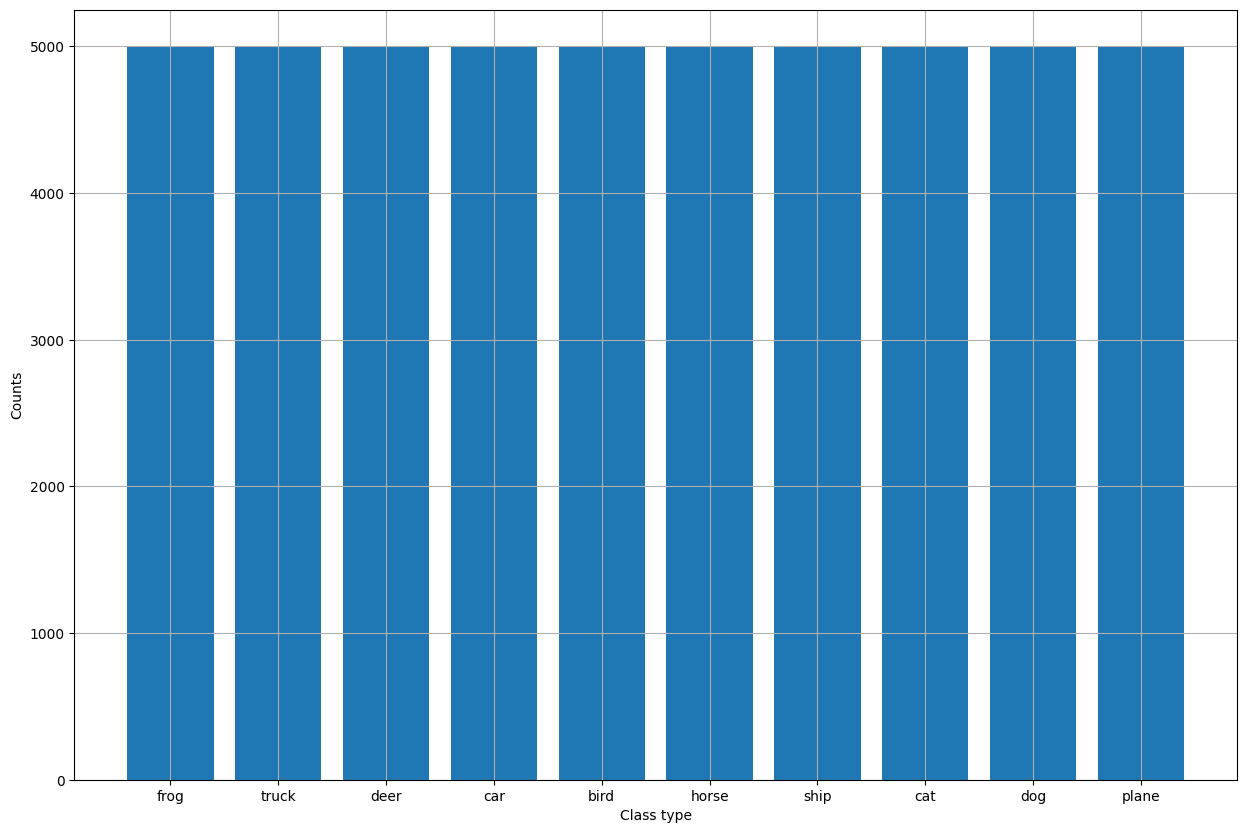

In [4]:
# Compute the class histogram
c = (classes[x[0]] for x in y_train)
hist = Counter(c)


plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Class type'), plt.ylabel('Counts')



### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.



In [5]:
# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [6]:
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,618 (64.91 KB)

 Trainable params: 16,618 (64.91 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Training

Compile the model and train it.

In [7]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.3046 - loss: 1.9274 - val_accuracy: 0.4508 - val_loss: 1.5558
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 30s 84ms/step - accuracy: 0.4793 - loss: 1.4715 - val_accuracy: 0.5058 - val_loss: 1.3970
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.5276 - loss: 1.3544 - val_accuracy: 0.5448 - val_loss: 1.3022
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.5579 - loss: 1.2787 - val_accuracy: 0.5650 - val_loss: 1.2335
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.5787 - loss: 1.2160 - val_accuracy: 0.5914 - val_loss: 1.1783
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.5972 - loss: 1.1625 - val_accuracy: 0.6072 - val_loss: 1.1394
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.6132 - loss: 1.1182 - val_accuracy: 0.6138 - val_loss: 1.1173
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 28s 79ms/step - accuracy: 0.6287 - loss: 1.0832 - 

Train Acc      0.7045111060142517
Validation Acc 0.6618000268936157


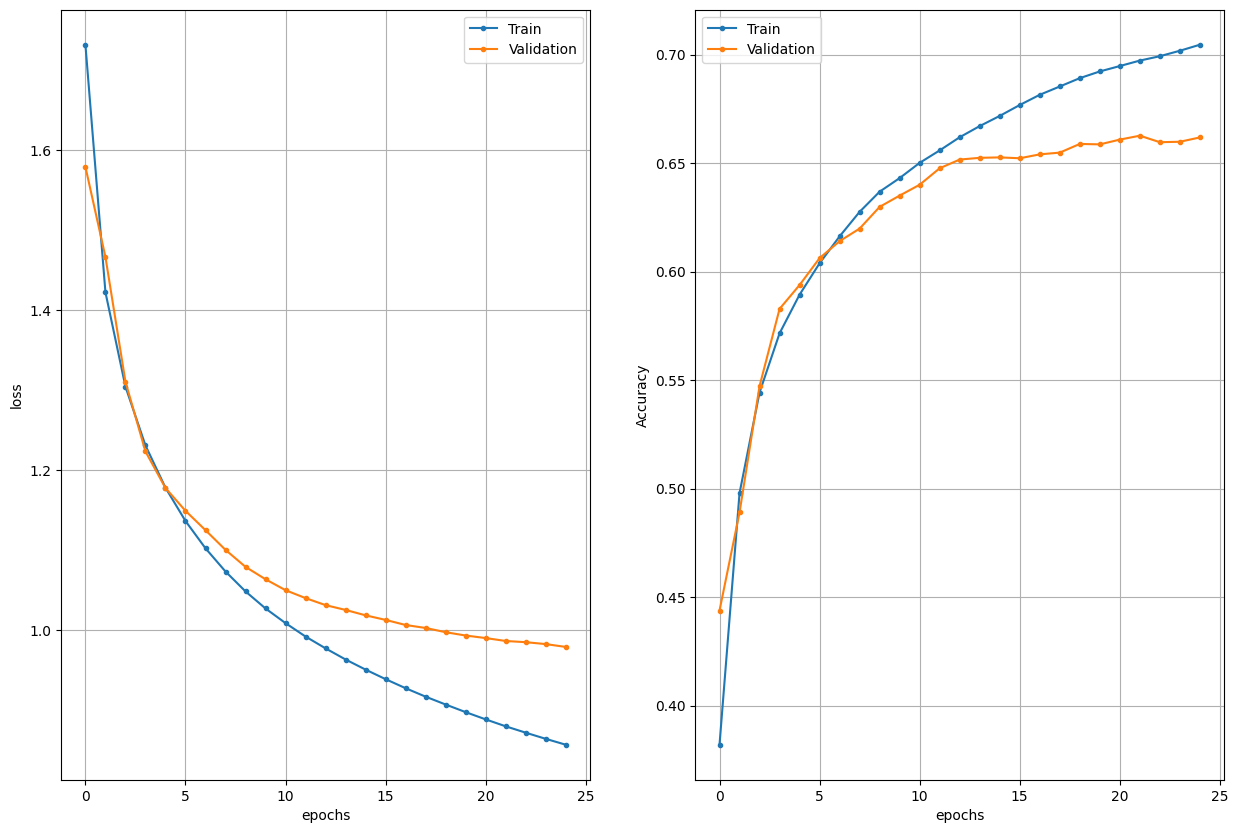

In [ ]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [31]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [32]:
# Compute and print the accuracy for each class
y_pred = np.argmax(y_pred, axis=1)
for class_id, class_name in classes.items():
    mask = y_true == class_id
    # Count the true positives
    tp = np.sum(np.abs(y_pred[mask] - class_id) < 0.5)
    total = np.sum(mask)
    acc =  tp / total
    print(class_name, acc)

plane 0.645
car 0.724
bird 0.465
cat 0.458
deer 0.743
dog 0.559
frog 0.781
horse 0.686
ship 0.717
truck 0.817


In [33]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6638 - loss: 0.9715
Test loss   0.987816572189331
Test metric 0.659500002861023


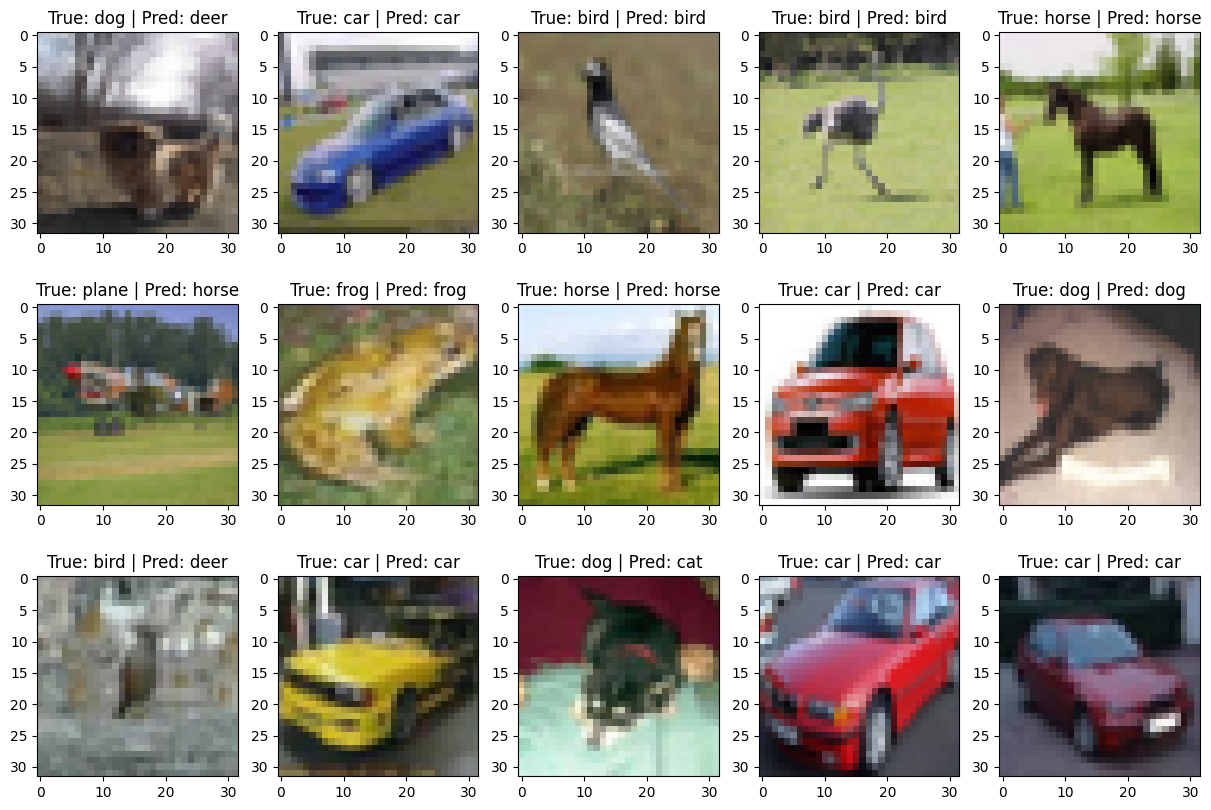

In [34]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(x_test))
    # Show the results
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...])
    plt.title('True: ' + str(classes[int(y_true[idx])]) + ' | Pred: ' + str(classes[int(y_pred[idx])]))

### Questions
* What is the overall accuracy of the classifier? \
Overall accuracy is 0.66
* What modifications would you do in order to improve the classification accuracy? \
Increase model depth to improve it`s classification abilities
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve? \
Adding one more layer for part of image improved accuracy by 5%

In [35]:
# Adding one more layer
# Build the classifier
inputs = Input(shape=(size, size, 3))

net = Conv2D(16, kernel_size=(3, 3), activation="leaky_relu")(inputs)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)

# Show the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          11,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,866 (101.04 KB)

 Trainable params: 25,866 (101.04 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
epochs = 25
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 223ms/step - accuracy: 0.3196 - loss: 1.8771 - val_accuracy: 0.4756 - val_loss: 1.5218
Epoch 2/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 74s 211ms/step - accuracy: 0.5133 - loss: 1.3719 - val_accuracy: 0.5650 - val_loss: 1.2522
Epoch 3/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 208ms/step - accuracy: 0.5792 - loss: 1.2089 - val_accuracy: 0.6136 - val_loss: 1.1227
Epoch 4/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 73s 208ms/step - accuracy: 0.6164 - loss: 1.1063 - val_accuracy: 0.6324 - val_loss: 1.0575
Epoch 5/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 85s 216ms/step - accuracy: 0.6405 - loss: 1.0371 - val_accuracy: 0.6536 - val_loss: 1.0098
Epoch 6/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 83s 219ms/step - accuracy: 0.6624 - loss: 0.9847 - val_accuracy: 0.6690 - val_loss: 0.9742
Epoch 7/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 79s 212ms/step - accuracy: 0.6766 - loss: 0.9413 - val_accuracy: 0.6760 - val_loss: 0.9508
Epoch 8/25
352/352 ━━━━━━━━━━━━━━━━━━━━ 74s 209ms/step - accuracy: 0.6892 - loss: 0

Train Acc      0.7787777781486511
Validation Acc 0.7093999981880188


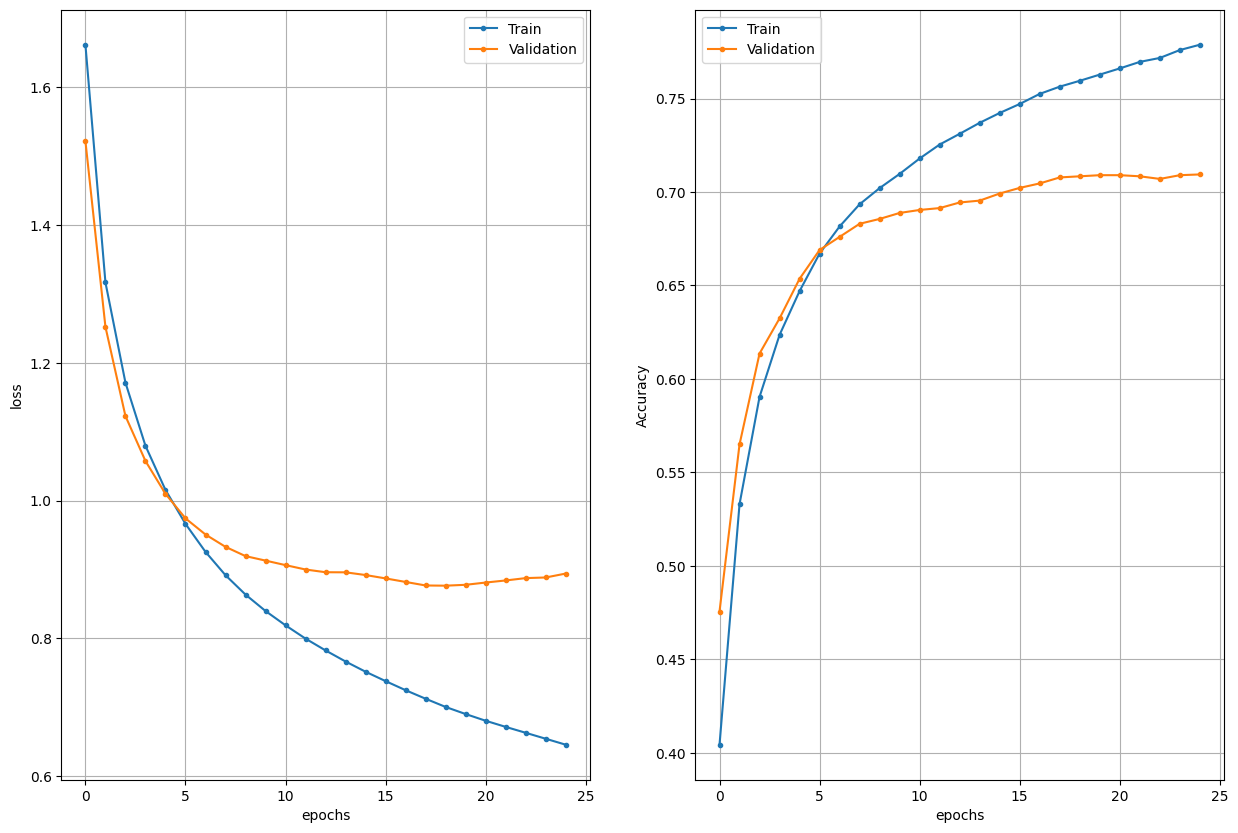

In [37]:
# Show training history
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])

In [39]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)
# Compute and print the accuracy for each class
y_pred = np.argmax(y_pred, axis=1)
for class_id, class_name in classes.items():
    mask = y_true == class_id
    # Count the true positives
    tp = np.sum(np.abs(y_pred[mask] - class_id) < 0.5)
    total = np.sum(mask)
    acc =  tp / total
    print(class_name, acc)
  # Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
plane 0.819
car 0.829
bird 0.646
cat 0.464
deer 0.644
dog 0.621
frog 0.732
horse 0.73
ship 0.73
truck 0.752
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6987 - loss: 0.8971
Test loss   0.9169634580612183
Test metric 0.6966999769210815
